<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [3]:
data <- read.csv("energy_efficiency_data.csv", sep = ",")
#data <- na.omit(data)
head(data)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [4]:
summary(data)

 Relative_Compactness  Surface_Area     Wall_Area       Roof_Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall_Height  Orientation    Glazing_Area    Glazing_Area_Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

In [5]:
#data_111 <- read.csv(file = file.choose(), header = TRUE, sep = ",")

#2

In [6]:
#деление на тестовую и обучающую выборку
index <- sample(1:nrow(data), nrow(data) * 0.8) 
test <- data[-c(index), ]
train <- data[index, ]

#3

In [7]:
#где выходом является у1 = sum(по всем столбцам, кроме Cooling_Load)
#lm_y1 <- lm(formula = Heating_Load ~ Relative_Compactness + Surface_Area 
            #+ Wall_Area + Roof_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train)
lm_y1 <- lm(formula = Heating_Load ~.-Cooling_Load, data = train)
summary(lm_y1)


Call:
lm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9181 -1.3616 -0.0247  1.3337  7.9102 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                75.753732  21.260338   3.563 0.000395 ***
Relative_Compactness      -57.840712  11.512998  -5.024 6.67e-07 ***
Surface_Area               -0.082654   0.019015  -4.347 1.62e-05 ***
Wall_Area                   0.064145   0.007299   8.788  < 2e-16 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              3.954048   0.373945  10.574  < 2e-16 ***
Orientation                 0.015191   0.107141   0.142 0.887294    
Glazing_Area               19.723739   0.911913  21.629  < 2e-16 ***
Glazing_Area_Distribution   0.121387   0.077539   1.566 0.117987    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [8]:
glm_y1 <- glm(Heating_Load ~.-Cooling_Load, data = train)
summary(glm_y1)


Call:
glm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.9181  -1.3616  -0.0247   1.3337   7.9102  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                75.753732  21.260338   3.563 0.000395 ***
Relative_Compactness      -57.840712  11.512998  -5.024 6.67e-07 ***
Surface_Area               -0.082654   0.019015  -4.347 1.62e-05 ***
Wall_Area                   0.064145   0.007299   8.788  < 2e-16 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              3.954048   0.373945  10.574  < 2e-16 ***
Orientation                 0.015191   0.107141   0.142 0.887294    
Glazing_Area               19.723739   0.911913  21.629  < 2e-16 ***
Glazing_Area_Distribution   0.121387   0.077539   1.566 0.117987    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [9]:
func_nlm <- function(a, b){
  a[1]*b[1]+a[2]*b[2]+a[3]*b[3]+a[4]*b[4]+a[5]*b[5]+a[6]*b[6]+a[7]*b[7]+a[8]*b[8]
}
fun1 <- function(a){
  sum((func_nlm(a, train[, 1:8]) - (train$Heating_Load))^2)
}

nlm_y1 <- nlm(fun1, p = c(0,0,0,0,0,0,0,0))$estimate
summary(nlm_y1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-17.443  -2.489   2.538   3.442  12.503  20.038 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’


hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     50
	error: 169940.62114
	time: 0.02 secs



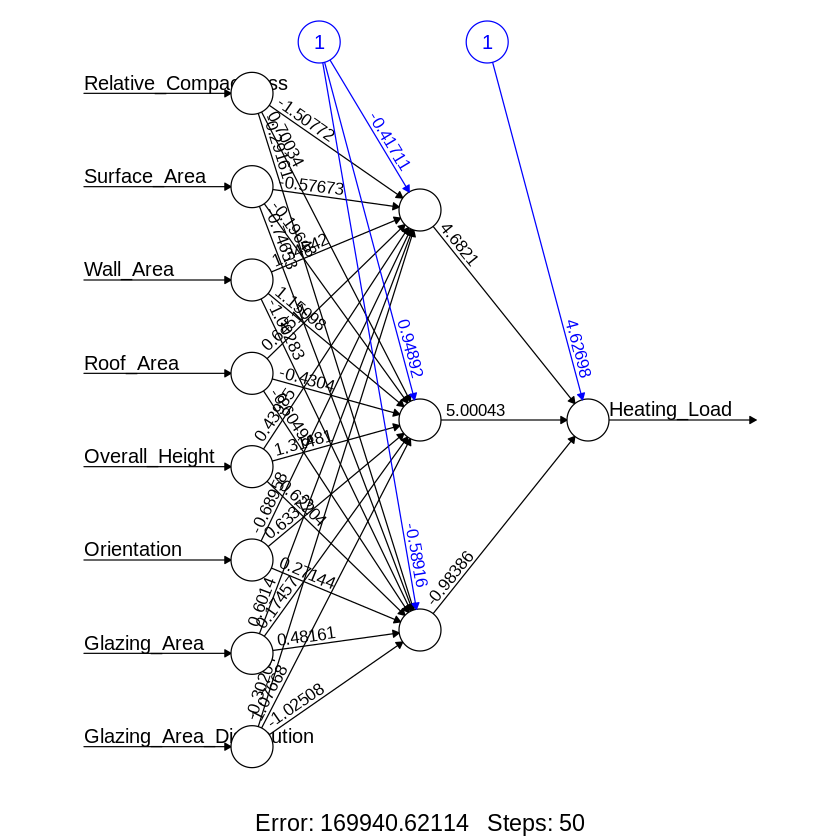

In [10]:
install.packages("neuralnet")
library(neuralnet)

neuralnet_y1 <- neuralnet(Heating_Load ~.-Cooling_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y1, rep = 1)

#-------------------------------------------------------------------------------------------------------------------------

In [11]:
#где выходом является у2 = sum(по всем столбцам, кроме Heating_Load)
lm_y2 <- lm(formula = Cooling_Load ~.-Heating_Load, data = train)
summary(lm_y2)


Call:
lm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6081 -1.6997 -0.2542  1.3081 11.5527 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                90.154424  22.853516   3.945 8.92e-05 ***
Relative_Compactness      -63.790558  12.375743  -5.154 3.45e-07 ***
Surface_Area               -0.085277   0.020440  -4.172 3.46e-05 ***
Wall_Area                   0.049760   0.007846   6.342 4.43e-10 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              3.955775   0.401967   9.841  < 2e-16 ***
Orientation                 0.153813   0.115170   1.336    0.182    
Glazing_Area               13.970534   0.980249  14.252  < 2e-16 ***
Glazing_Area_Distribution  -0.020403   0.083349  -0.245    0.807    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [12]:
glm_y2 <- glm(Cooling_Load ~.-Heating_Load, data = train)
summary(glm_y2)


Call:
glm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.6081  -1.6997  -0.2542   1.3081  11.5527  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                90.154424  22.853516   3.945 8.92e-05 ***
Relative_Compactness      -63.790558  12.375743  -5.154 3.45e-07 ***
Surface_Area               -0.085277   0.020440  -4.172 3.46e-05 ***
Wall_Area                   0.049760   0.007846   6.342 4.43e-10 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              3.955775   0.401967   9.841  < 2e-16 ***
Orientation                 0.153813   0.115170   1.336    0.182    
Glazing_Area               13.970534   0.980249  14.252  < 2e-16 ***
Glazing_Area_Distribution  -0.020403   0.083349  -0.245    0.807    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [13]:
fun2 <- function(a){
  sum((func_nlm(a, train[, 1:8]) - (train$Cooling_Load))^2)
}
nlm_y2 <- nlm(fun2, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))$estimate
summary(nlm_y2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-15.714  -2.607   2.657   3.049  11.309  20.716 

hidden: 3    thresh: 0.01    rep: 1/1    steps: 
     43
	error: 197549.82768
	time: 0.01 secs



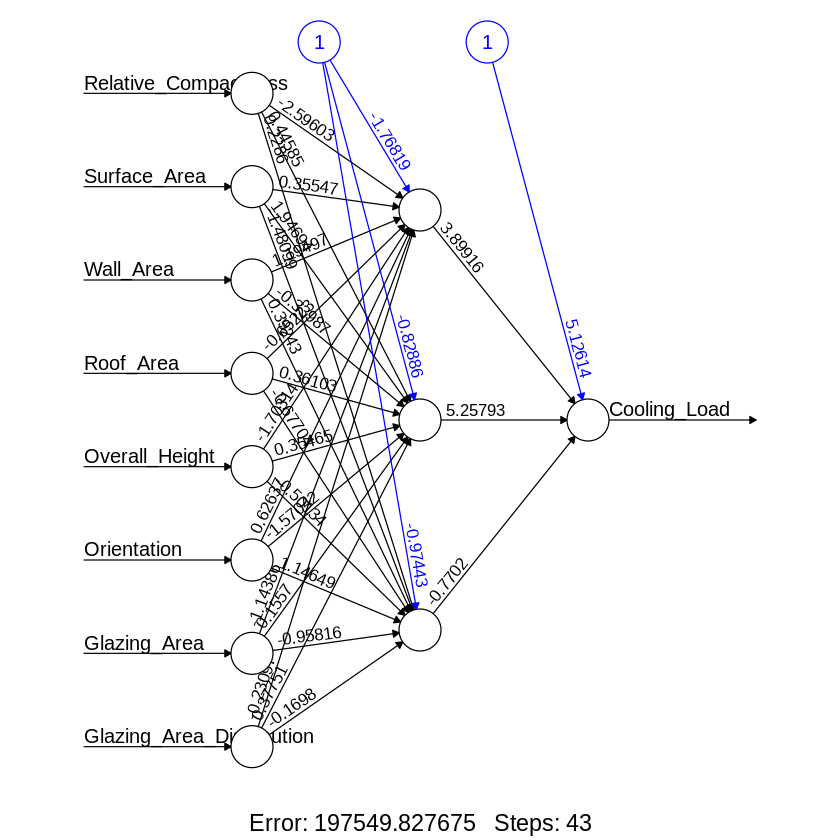

In [14]:
neuralnet_y2 <- neuralnet(Cooling_Load ~.-Heating_Load, data = train, hidden = 3, linear.output = FALSE, lifesign = "full", stepmax = 1000000000)
plot(neuralnet_y2, rep = 1)

#4

In [15]:
#линейная
pred_lm_y1 <- predict(lm_y1, test)
pred_lm_y2 <- predict(lm_y2, test)
#логистическая
pred_glm_y1 <- predict(glm_y1, test)
pred_glm_y2 <- predict(glm_y2, test)
#полиномиальная
pred_nlm_y1 <- func_nlm(nlm_y1, test[, 1:8])
pred_nlm_y2 <- func_nlm(nlm_y2, test[, 1:8])
#нейросеть
pred_nn_y1 <- compute(neuralnet_y1, test[, 1:8])
pred_nn_y2 <- compute(neuralnet_y2, test[, 1:8])

Warning message in predict.lm(lm_y1, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(lm_y2, test):
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


In [16]:
accuracy <- function(pred, y){
  return (1 - norm(as.matrix(pred)-as.matrix(y)) / norm(as.matrix(y)))
}
acc_lm_y1 <- accuracy(pred_lm_y1, test$Heating_Load)
acc_glm_y1 <- accuracy(pred_glm_y1, test$Heating_Load)
acc_nn_y1 <- pred_nn_y1$net.result
acc_nlm_y1 <- accuracy(pred_nlm_y1, test$Heating_Load)

acc_lm_y2 <- accuracy(pred_lm_y2, test$Cooling_Load)
acc_glm_y2 <- accuracy(pred_glm_y2, test$Cooling_Load)
acc_nn_y2 <- pred_nn_y1$net.result
acc_nlm_y2 <- accuracy(pred_nlm_y2, test$Cooling_Load)

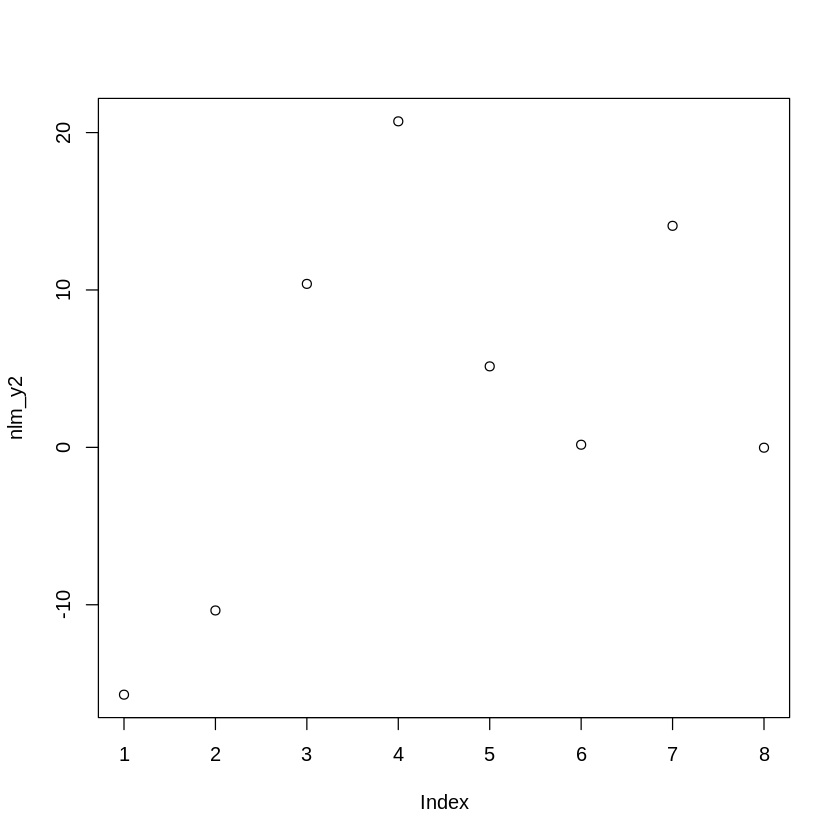

In [17]:
plot(nlm_y2)

#5

In [18]:
r1 = c(acc_lm_y1, acc_glm_y1, acc_nlm_y1, acc_nn_y1[1])
r2 = c(acc_lm_y2, acc_glm_y2, acc_nlm_y2, acc_nn_y2[1])

table_0 <- matrix(c(r1,r2), ncol=4, byrow=TRUE)
colnames(table_0) <- c('lm', 'glm', 'nlm', 'nn')
rownames(table_0) <- c('y1', 'y2')
rezult <- as.table(table_0)
print(rezult)

          lm       glm       nlm        nn
y1 0.9062301 0.9062301 0.9011487 0.9999994
y2 0.9035283 0.9035283 0.8988469 0.9999994


#6

In [19]:
variable_nn <- function(a, b, c){
  w <- c - as.matrix(test[, 1:8]) %*% a[2:9] - a[1]
  return (norm(w, b))
}
nlm(variable_nn, 1:9, b = '1', c = test$Heating_Load)

$minimum
[1] 425.9219

$estimate
[1] -0.5539154 -1.0164466 -1.8472374  1.8890286  3.6318687  2.9784882  0.4652786
[8] 12.3784936  0.7035682

$gradient
[1]    42.000    29.110 32306.690 12684.699  9592.746   123.655   188.000
[8]     5.900   145.000

$code
[1] 3

$iterations
[1] 12

In [20]:
nlm(variable_nn, 1:9, b = '1', c = test$Cooling_Load)

$minimum
[1] 3830.843

$estimate
[1]   81.4264163  255.3492533 -123.1236381  122.9853611  245.7444471
[6]  -15.4660636   -3.6016977  -14.1390285   -0.2267212

$gradient
[1]    66.00    55.39 41895.81 17482.03 11369.06   339.50   218.00    11.10
[9]   165.00

$code
[1] 3

$iterations
[1] 12

In [21]:
nlm(variable_nn, 1:9, b = 'I', c = test$Heating_Load)

$minimum
[1] 7.801995

$estimate
[1]  -0.9733813 -17.7756401  -1.8382120   1.9152302   3.5905874   3.8406509
[7]   0.1069033  27.0505169   0.2208830

$gradient
[1]   1.00   0.82 612.50 318.50 147.00   7.00   5.00   0.00   0.00

$code
[1] 2

$iterations
[1] 72

In [22]:
nlm(variable_nn, 1:9, b = 'I', c = test$Cooling_Load)

$minimum
[1] 37.2363

$estimate
[1]  0.9721702  1.9625496 -1.8449024  1.6739849  3.7405569  5.7477657  5.7630285
[8]  7.7825751  6.6013518

$gradient
[1]   0.3362405   0.1463284  24.6822538 -73.2991377  49.0898905  -1.6915007
[7]   1.5583444   0.1932043   2.0509351

$code
[1] 2

$iterations
[1] 9

In [28]:
#install.packages("quantreg")
library(quantreg)
mape_nn_y1 <- rq(formula = Heating_Load ~ Relative_Compactness + Surface_Area 
            + Wall_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train, tau = 0.2)
pred_mape_nn_y1 <- predict(mape_nn_y1, test)
result_mape_nn_y1 <- 1.0 / length(test$Heating_Load) * sum(abs((test$Heating_Load - pred_mape_nn_y1) / (test$Heating_Load)))

mape_nn_y2 <- rq(formula = Cooling_Load ~  Relative_Compactness + Surface_Area 
            + Wall_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train, tau = 0.2)
pred_mape_nn_y2 <- predict(mape_nn_y2, test)
result_mape_nn_y2 <- 1.0 / length(test$Cooling_Load) * sum(abs((test$Cooling_Load - pred_mape_nn_y2) / (test$Cooling_Load)))

In [35]:
q1 = c(result_mape_nn_y1)
q2 = c(result_mape_nn_y2)

table_1 <- matrix(c(q1,q2), ncol=1, byrow=TRUE)
colnames(table_1) <- c('MAPE')
rownames(table_1) <- c('y1', 'y2')
rezult2 <- as.table(table_1)
print(rezult2)

         MAPE
y1 0.12911696
y2 0.09995035
